In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
from SloppyCell.ReactionNetworks import *
from copy import deepcopy
from pandas import *

In [7]:
genotypes = {}

#genotypes['pp6-18'] = []
#genotypes['pp8-16'] = []
#genotypes['pp12-12'] = []
#genotypes['pp18-6'] = []
genotypes['col_0_LL'] = []
genotypes['col_0_DD'] = []
genotypes['prr79_LL'] = ['cP9_m','cP7_m']
genotypes['prr79_DD'] = ['cP9_m','cP7_m']
genotypes['lhycca1_LL'] = ['cL_m']
genotypes['lhycca1_DD'] = ['cL_m']
genotypes['toc1_LL'] = ['cT_m']
genotypes['toc1_DD'] = ['cT_m']
genotypes['gi_LL'] = ['cG_m']
genotypes['gi_DD'] = ['cG_m']
genes = {'cL_m':'cca1','cP9_m':'prr9','cP7_m':'prr7','cP5_m':'prr5',
         'cT_m':'toc1','cLUX_m':'lux','cG_m':'gi','cE3_m':'elf3','cE4_m':'elf4'}

In [10]:
book = ExcelFile('data/PhotoPeriodTiMetEdited.xlsx')
book.sheet_names

data = {}
for network in book.sheet_names:
    data[network] =book.parse(network)
nuclei_number_gFW = 25.0e6
uncertainty = 0.35
displacement=0

network_data={}
for network in data.keys():
    if network not in genotypes.keys():
        continue

    gene_dict = {}
    for gene in genes.keys():
        try:
            if gene in genotypes[network]:
                continue
        except:
            pass
        time_dict={}
        for zt in range(0,len(data[network][genes[gene]]),2):

            if not (np.isnan(data[network][genes[gene]][zt]) or np.isnan(data[network][genes[gene]][zt+1])):
                points  = np.log(np.array([data[network][genes[gene]][zt],
                                           data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                data_mean=np.mean(points)
                data_var=np.std(points)

                if math.isnan(data_var):
                    data_var = 0.35


            time_dict[zt+displacement] = (data_mean,data_var)
        gene_dict['log_'+gene]=time_dict
    network_data[network]=gene_dict

In [9]:
P2011_entre = IO.from_SBML_file('models/col_0.xml', 'P2011_entre', duplicate_rxn_params=True)
P2011 = P2011_entre.copy('P2011')
params = P2011.GetParameters()
days_entre = 20
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011_entre.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011_entre.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1

P2011_entre.compile()
traj = Dynamics.integrate(P2011_entre,(0,24*19), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))

days_entre = 1
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1
P2011.compile()
params = P2011.GetParameters()

In [31]:
isnan(nan)

True

In [11]:
import seaborn
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)

NameError: name 'measurements' is not defined

In [50]:
book.parse(network)

,ZT,ACT2 155,ACT2 633,GAPDH3',GAPDH5',lhy,cca1,prr9,prr7,prr5,toc1,lux,gi,elf3,elf4,PIF 4,PIF 5
0,0,6.494171e+10,5.662046e+10,3.790370e+10,3.889126e+10,2.688487e+10,5.582044e+09,1.906186e+05,1.859382e+07,1.039799e+08,9.318463e+08,2.511002e+08,1.076378e+07,2.203398e+09,1.881723e+08,2.620141e+07,2.026982e+09
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5.293913e+10,3.644554e+10,2.847327e+10,2.029481e+10,2.369768e+10,6.305718e+09,3.538796e+08,8.542579e+08,4.569294e+07,2.179746e+08,2.085648e+08,5.639612e+08,4.761532e+08,6.884565e+07,1.873329e+09,6.482399e+09
3,2,5.187195e+10,4.313024e+10,2.320772e+10,1.023493e+10,1.646922e+10,4.553515e+09,1.689451e+08,6.874471e+08,4.928471e+07,1.868323e+08,1.485635e+08,4.802449e+08,3.390047e+08,4.009654e+07,1.371252e+09,4.247681e+09
4,4,5.886208e+10,4.918328e+10,2.105495e+10,1.242248e+10,9.715990e+09,3.248689e+09,3.500996e+08,2.162906e+09,5.675263e+07,2.483800e+08,1.251755e+08,5.675845e+08,2.298109e+08,1.640632e+07,1.288481e+09,1.886277e+09
5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6.575254e+10,3.256843e+10,2.001764e+10,6.746059e+09,3.405611e+09,1.210093e+09,5.216547e+08,3.503044e+09,2.949534e+08,4.265574e+08,3.045747e+08,1.265842e+09,6.369466e+08,1.417390e+08,5.260240e+09,5.432810e+09
7,6,6.044174e+10,4.819136e+10,1.812566e+10,1.568799e+10,3.124147e+09,1.288918e+09,3.399143e+08,3.785995e+09,3.368651e+08,3.569040e+08,2.852137e+08,1.678771e+09,7.017360e+08,1.171789e+08,4.907043e+09,4.141263e+09
8,8,5.073367e+10,4.619219e+10,2.034366e+10,1.492609e+10,7.702890e+08,3.201775e+08,4.801286e+08,4.298926e+09,4.362915e+09,1.651669e+09,1.339413e+09,4.125180e+09,2.006788e+09,1.667217e+09,7.346735e+09,5.436695e+09
9,8,4.073784e+10,2.508282e+10,1.693725e+10,1.111174e+10,5.125188e+08,2.290277e+08,3.192794e+08,3.425523e+09,2.761512e+09,1.089626e+09,9.070466e+08,3.584905e+09,9.685328e+08,1.458199e+09,5.063822e+09,4.271051e+09


/Users/jurquiza/Documents/Phd/FourthYear/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


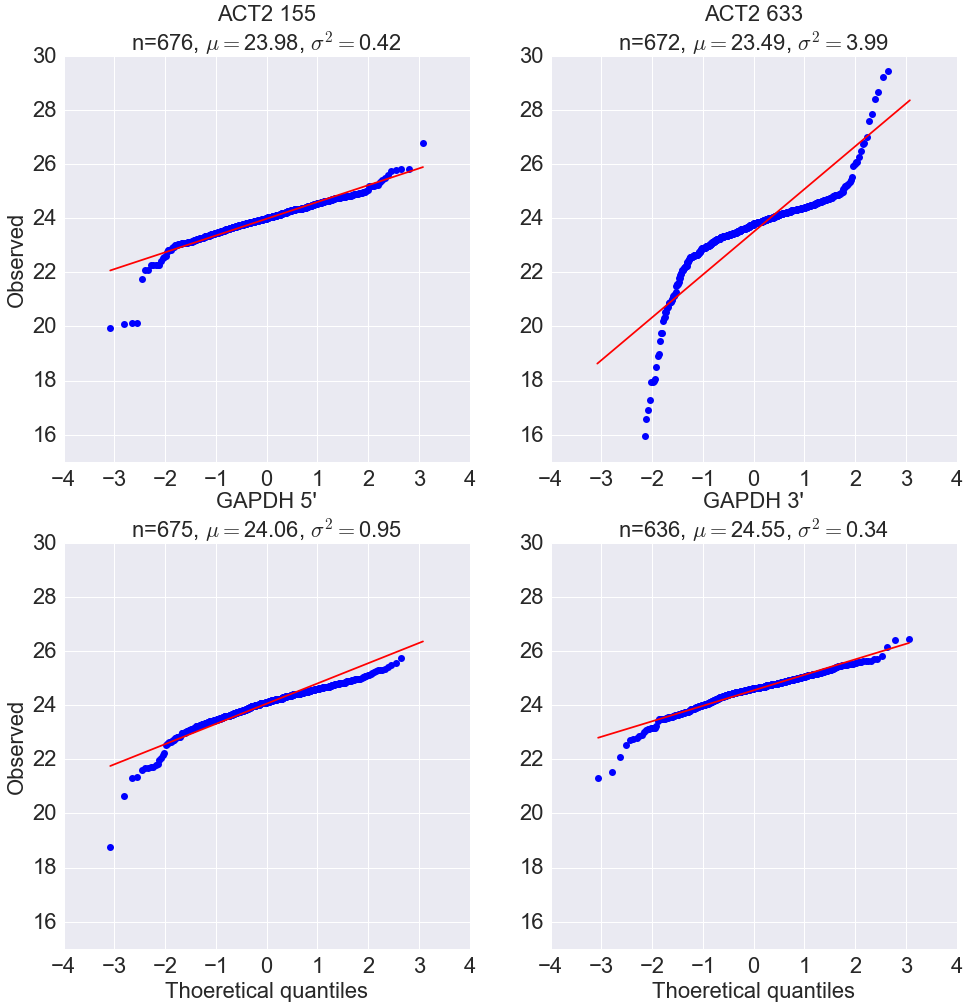

In [12]:
figure(figsize=(16,16))
variance = []
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 155']:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 633']:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
#variance.append(var(x))
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
ylabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
variance.append(var(x))               
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
#ylabel('Frequncy', fontsize=22)
savefig('images/residuals_flis.pdf', format='pdf', dpi=300)

In [33]:
x

[44586357360.136459,
 55958271933.082787,
 49442500717.991127,
 11282701455.898407,
 42802837952.732056,
 27138274917.412148,
 43853246165.746315,
 39680442000.538536,
 50172648982.616997,
 81578685573.034378,
 48363785083.877861,
 58341251056.226532,
 81590995656.913635,
 44674553424.70842,
 61538663047.539673,
 52315479025.319107,
 40769045334.50238,
 57333385202.427826,
 52106788472.628265,
 57425495345.73806,
 66219058654.772141,
 57522062495.698845,
 45816314509.865967,
 133772358382.48784,
 35228323918.828117,
 127312391210.351,
 26824945684.492134,
 20799208776.060043,
 44855804661.519974,
 12097176707.821331,
 20859548138.562351,
 16698540090.458284,
 9894432493.8156624,
 8565956240.6761646,
 17162035777.718641,
 18353593099.071529,
 11231105357.260296,
 19087047249.227024,
 28137625819.378319,
 20298939311.758392,
 35794953420.840851,
 16874787150.135059,
 33026239158.17601,
 24075993353.657269,
 25703081184.272758,
 56811540746.883255,
 50909219755.178871,
 51602430801.353683

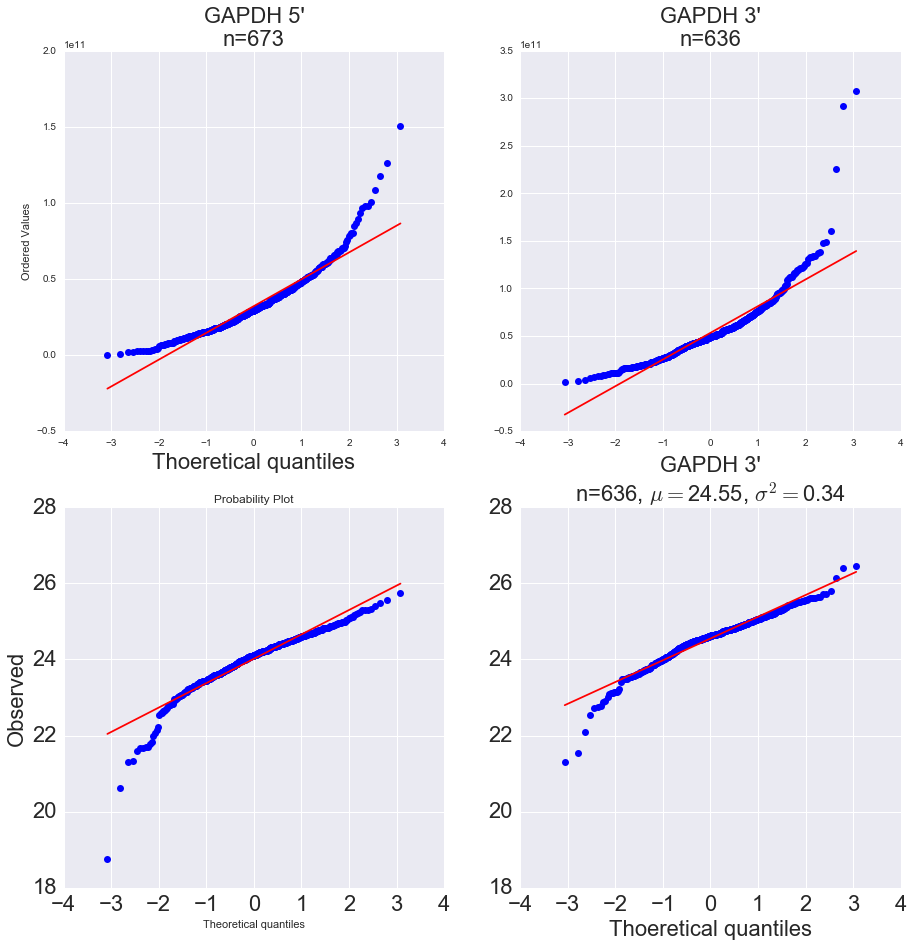

In [163]:
figure(figsize=(15,15))
logx=[]
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                if log(i) > 30:
                    continue
                else:
                    logx.append(log(i))
                    x.append(i)
                    n+=1

subplot(221)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
subplot(223)
stats.probplot(logx, dist="norm", plot=pylab)

#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(exp(15),exp(30))
ylim(18,28)
x=[]
logx=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                logx.append(log(i))
                x.append(i)
                n+=1
variance.append(var(x))               
subplot(222)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n), fontsize=22)
ylabel('')
xlabel('')
subplot(224)
stats.probplot(logx, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(logx),2))+', $\sigma^2=$'+str(round(var(logx),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(18,28)
#ylabel('Frequncy', fontsize=22)
savefig('images/residuals_flis.pdf', format='pdf', dpi=300)

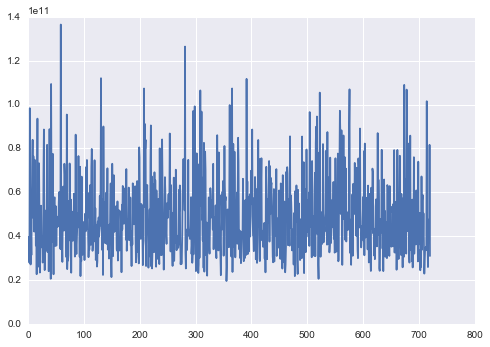

In [104]:
t = linspace(0,24*30,1000)
y = mean(logx)+0.007*sin(2*pi/24*t)+random.normal(scale=0.34, size=len(t))
plot(t,exp(y))


(array([ 137.,  300.,  246.,  172.,   72.,   45.,   15.,   11.,    0.,    2.]),
 array([  1.95114252e+10,   3.12114534e+10,   4.29114816e+10,
          5.46115098e+10,   6.63115379e+10,   7.80115661e+10,
          8.97115943e+10,   1.01411622e+11,   1.13111651e+11,
          1.24811679e+11,   1.36511707e+11]),
 <a list of 10 Patch objects>)

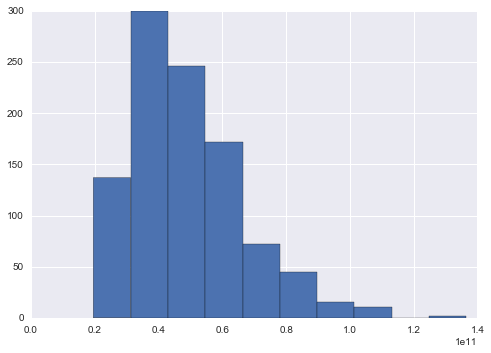

In [105]:
hist(exp(y))


In [149]:
concatenate((y,y))

array([ 24.42115312,  24.94470356,  23.96058945,  24.02537973,
        25.20539372,  23.96336502,  25.86110281,  23.88482802,
        25.40408523,  24.21109311,  24.21753542,  23.75257195,
        24.42766975,  23.80971793,  25.1199722 ,  23.9054642 ,
        24.70702139,  24.47021263,  24.92310109,  25.53654104,
        25.91135479,  23.94846874,  24.67063313,  24.41948693,
        25.54353621,  25.13925642,  25.10399153,  25.3970388 ,
        23.5322883 ,  24.83785854,  24.07726857,  24.36976352,
        23.80223391,  24.70560318,  24.67667595,  25.45518143,
        24.00491407,  24.630382  ,  24.74027639,  22.78744281,
        25.18278483,  24.47539064,  24.2701861 ,  24.7076085 ,
        24.00188273,  24.48265019,  25.29660466,  25.66686443,
        24.94901911,  23.31254431,  25.05341588,  23.63242614,
        24.60944898,  23.99967513,  25.08383256,  23.82149286,
        23.3389405 ,  22.35024648,  23.9589275 ,  25.47600977,
        25.18155412,  24.07962294,  22.6117982 ,  23.92

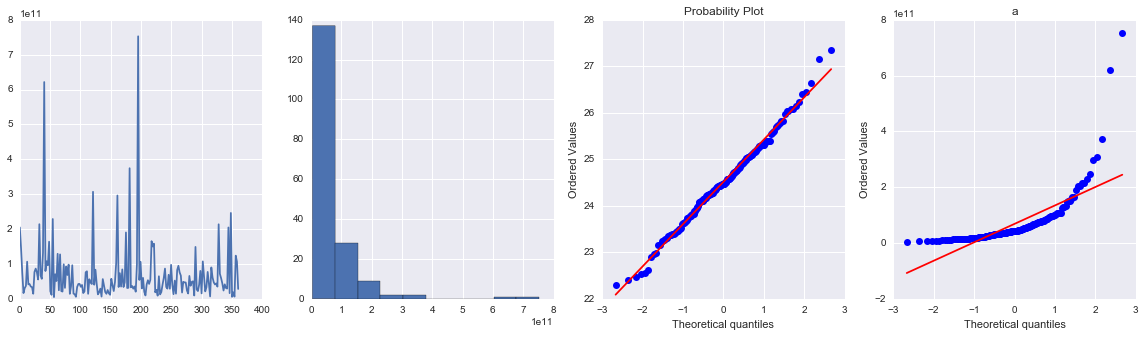

In [234]:
figure(figsize=(20,5))
timesieries = 5
t = linspace(0,24*3*timesieries,24*3/2*timesieries)
y = mean(logx)+random.normal(scale=0.9, size=len(t))
subplot(1,4,1)
plot(t,exp(y))
subplot(1,4,2)
hist(exp(y))
subplot(1,4,3)
stats.probplot(log(exp(y)), dist="norm", plot=pylab)
subplot(1,4,4)
stats.probplot(exp(y), dist="norm", plot=pylab)
title('a')

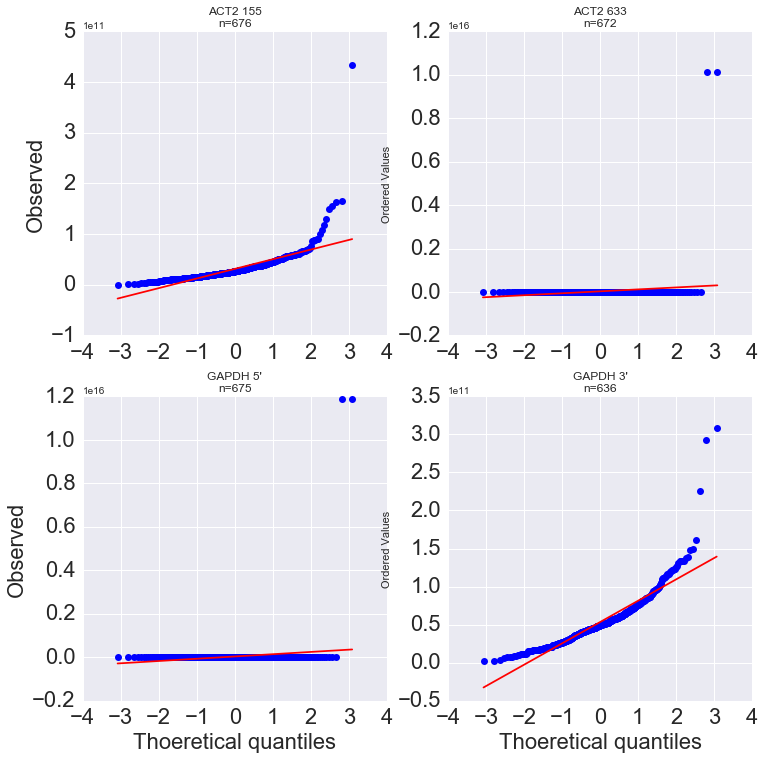

In [115]:
figure(figsize=(12,12))
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 155']:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n))
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
xlabel('')
x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 633']:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n))
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
xlabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n))
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n))
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
#ylabel('Frequncy', fontsize=22)


In [32]:
params = Utility.load('../remote_work/Fittings/FullData_001_sigma_period/params_21.bp')

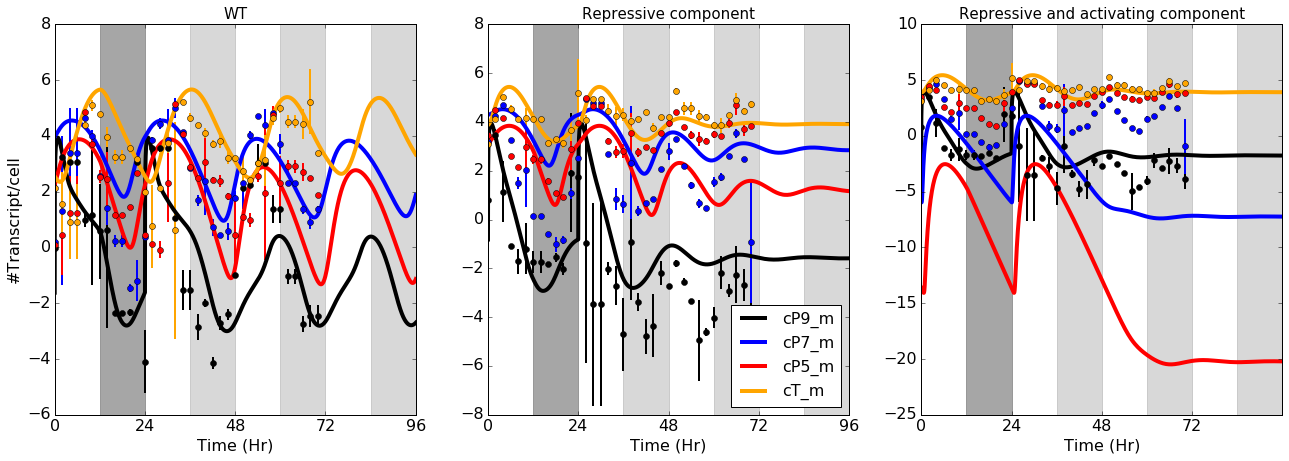

In [33]:
figure(figsize=(22,7))
subplot(131)

traj = Dynamics.integrate(P2011_entre,(0,24*20), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=params)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['col_0_LL']['log_cP9_m'].keys()),
         array(network_data['col_0_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['col_0_LL']['log_cP7_m'].keys()),
         array(network_data['col_0_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['col_0_LL']['log_cP5_m'].keys()),
         array(network_data['col_0_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['col_0_LL']['log_cT_m'].keys()),
         array(network_data['col_0_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')

axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
ylabel('#Transcript/cell', fontsize=16)
xlim(0,24*4)
title('WT', fontsize=15)


subplot(132)
lhycca1 = deepcopy(params)
lhycca1.setByKey('cl_mut',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_LL']['log_cP9_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_LL']['log_cP7_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cP5_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cT_m'].keys()),
         array(network_data['lhycca1_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)

for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
xlim(0,24*4)
legend(loc='lower right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive component', fontsize=15)



subplot(133)
lhycca1.setByKey('cl_mut',1)
lhycca1.setByKey('p1',0)
lhycca1.setByKey('p2',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_LL']['log_cP9_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_LL']['log_cP7_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cP5_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cT_m'].keys()),
         array(network_data['lhycca1_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,4,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*4)
xticks(range(0,24*4,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive and activating component', fontsize=15)

savefig('images/P2011_cL_m_and_cT_m.pdf', format='pdf', dpi=300)

In [36]:
P2011_entre = IO.from_SBML_file('models/col_0.xml', 'P2011_entre', duplicate_rxn_params=True)
P2011 = P2011_entre.copy('P2011')
days_entre = 20
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011_entre.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011_entre.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1

P2011_entre.compile()
traj = Dynamics.integrate(P2011_entre,(0,24*19), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))

days_entre = 1
flag=1
light = 'light'
for i in range(0,24*(days_entre),12):
            if flag:
                P2011.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1
P2011.compile()

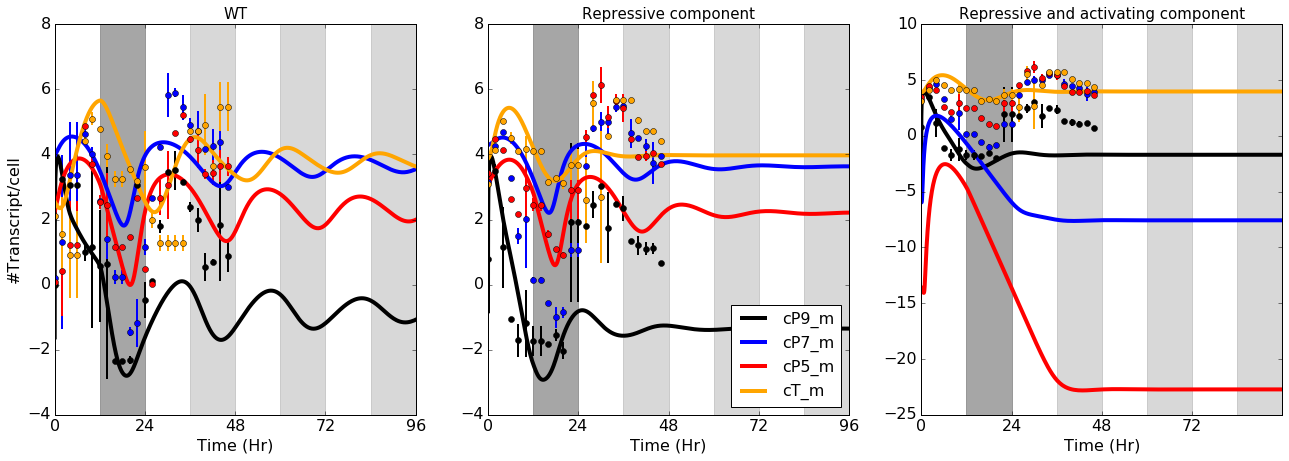

In [37]:
figure(figsize=(22,7))
subplot(131)

traj = Dynamics.integrate(P2011_entre,(0,24*20), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=params)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['col_0_DD']['log_cP9_m'].keys()),
         array(network_data['col_0_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['col_0_DD']['log_cP7_m'].keys()),
         array(network_data['col_0_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['col_0_DD']['log_cP5_m'].keys()),
         array(network_data['col_0_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['col_0_DD']['log_cT_m'].keys()),
         array(network_data['col_0_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')

axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
ylabel('#Transcript/cell', fontsize=16)
xlim(0,24*4)
title('WT', fontsize=15)


subplot(132)
lhycca1 = deepcopy(params)
lhycca1.setByKey('cl_mut',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_DD']['log_cP9_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_DD']['log_cP7_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cP5_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cT_m'].keys()),
         array(network_data['lhycca1_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)

for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
xlim(0,24*4)
legend(loc='lower right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive component', fontsize=15)



subplot(133)
lhycca1.setByKey('cl_mut',1)
lhycca1.setByKey('p1',0)
lhycca1.setByKey('p2',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_DD']['log_cP9_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_DD']['log_cP7_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cP5_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cT_m'].keys()),
         array(network_data['lhycca1_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,4,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*4)
xticks(range(0,24*4,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive and activating component', fontsize=15)

savefig('images/P2011_cL_m_and_cT_m.pdf', format='pdf', dpi=300)

In [6]:
genotypes = {}

#genotypes['pp6-18'] = []
#genotypes['pp8-16'] = []
#genotypes['pp12-12'] = []
#genotypes['pp18-6'] = []
genotypes['col_0_LL'] = []
genotypes['col_0_DD'] = []
genotypes['prr79_LL'] = ['cP9_m','cP7_m']
genotypes['prr79_DD'] = ['cP9_m','cP7_m']
genotypes['lhycca1_LL'] = ['cL_m']
genotypes['lhycca1_DD'] = ['cL_m']
genotypes['toc1_LL'] = ['cT_m']
genotypes['toc1_DD'] = ['cT_m']
genotypes['gi_LL'] = ['cG_m']
genotypes['gi_DD'] = ['cG_m']
genes = {'cL_m':'cca1','cP9_m':'prr9','cP7_m':'prr7','cP5_m':'prr5',
         'cT_m':'toc1','cLUX_m':'lux','cG_m':'gi','cE3_m':'elf3','cE4_m':'elf4'}

In [9]:
book = ExcelFile('data/PhotoPeriodTiMetEdited.xlsx')
book.sheet_names

data = {}
for network in book.sheet_names:
    data[network] =book.parse(network)
nuclei_number_gFW = 25.0e6
uncertainty = 0.35
displacement=0

network_data={}
for network in data.keys():
    if network not in genotypes.keys():
        continue

    gene_dict = {}
    for gene in genes.keys():
        try:
            if gene in genotypes[network]:
                continue
        except:
            pass
        time_dict={}
        for zt in range(0,len(data[network][genes[gene]]),2):

            if not (np.isnan(data[network][genes[gene]][zt]) or np.isnan(data[network][genes[gene]][zt+1])):
                points  = np.log(np.array([data[network][genes[gene]][zt],
                                           data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                data_mean=np.mean(points)
                data_var=np.std(points)

                if math.isnan(data_var):
                    data_var = 0.35


            time_dict[zt+displacement] = (data_mean,data_var)
        gene_dict['log_'+gene]=time_dict
    network_data[network]=gene_dict

In [ ]:
errorbar(array(network_data['col_0_LL']['log_cL_m'].keys()),
         array(network_data['col_0_LL']['log_cL_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cL_m'].values())[:,1], fmt='o', capsize=0)

In [ ]:
errorbar(array(network_data['col_0_LL']['log_cP9_m'].keys())-24*9,
         array(network_data['col_0_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP9_m'].values())[:,1], fmt='o', capsize=0)